## Neural Network Assignment:

**Problem Statement:** Predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

**Attribute Information:**

The explanations of sensor measurements and their brief statistics are given below.

1. Variable (Abbr.) Unit Min Max Mean
2. Ambient temperature (AT) C â€“6.23 37.10 17.71
3. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
4. Ambient humidity (AH) (%) 24.08 100.20 77.87
5. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
6. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
7. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
8. Turbine after temperature (TAT) C 511.04 550.61 546.16
9. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
10. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
11. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
12. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# 1. Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot as off

from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [3]:
!pip install keras-tuner --upgrade

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset:

In [7]:
gas_turbine = pd.read_csv('gas_turbines.csv')
gas_turbine

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# 3. Data understanding / EDA:

## 3.1 Descriptive Analysis:

In [8]:
gas_turbine.shape

(15039, 11)

In [9]:
gas_turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [11]:
gas_turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [12]:
gas_turbine.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [13]:
gas_turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [14]:
gas_turbine.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [15]:
gas_turbine[gas_turbine.duplicated()].shape

(0, 11)

In [16]:
gas_turbine[gas_turbine.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [17]:
gas_turbine.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

1. From the above description, it has been observed that the features are not on the same scale. 
2. For e.g. **AP** has a mean of **1013.19** and **CO** has a mean value of **1.97.** 
3. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. 
4. We will check further.

In [18]:
gas_turbine.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [19]:
numerical_features = gas_turbine.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# 4. Data Visualization:

## 4.1 Univariate plots:

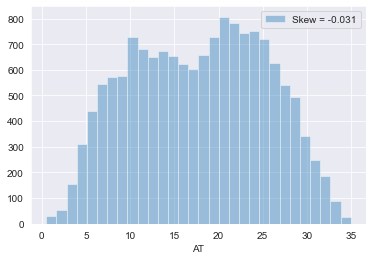

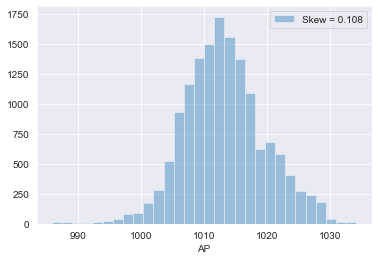

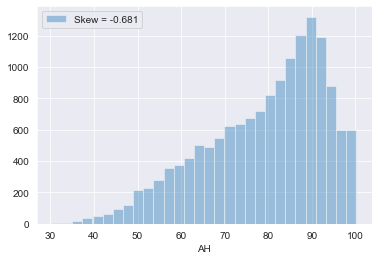

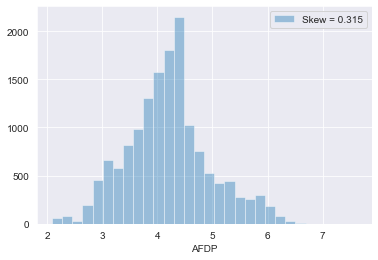

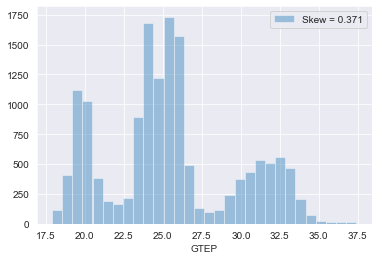

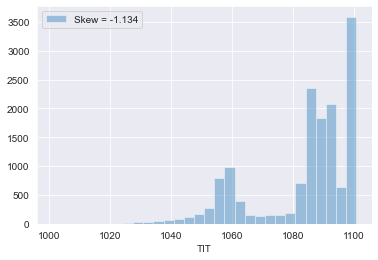

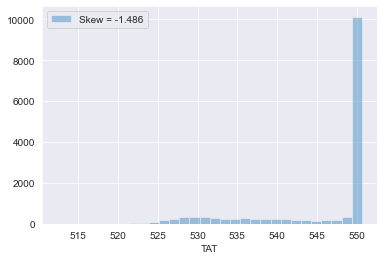

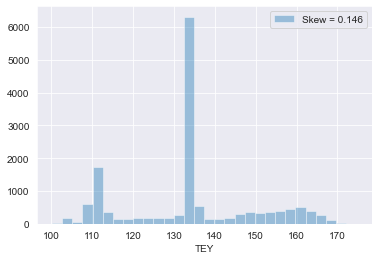

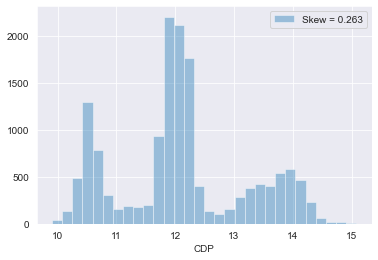

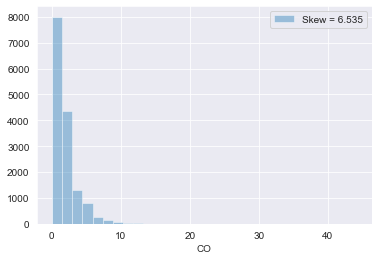

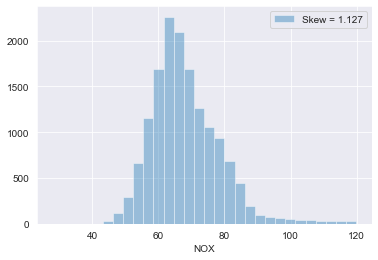

In [20]:
numerical_features=[feature for feature in gas_turbine.columns if gas_turbine[feature].dtypes != 'O']

for feat in numerical_features:
    skew = gas_turbine[feat].skew()
    sns.distplot(gas_turbine[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

1. From above plots, some of the features are normally distributed. 
2. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. 
3. Distribution of Carbon Mono oxide (CO), Turbine inlet temperature (TIT), Turbine after temperature (TAT) seem to contain many outliers. 
4. Let's identify the indices of the observations containing outliers using **Turkey's method.**

In [21]:
# Detect observations with more than one outlier by Turkey's method:

def outlier_hunt(gas_turbine):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
# Iterate over features(columns):

    for col in gas_turbine.columns.tolist():
        
        # 1st quartile (25%):
        Q1 = np.percentile(gas_turbine[col], 25)
        
        # 3rd quartile (75%):
        Q3 = np.percentile(gas_turbine[col],75)
        
        # Interquartile rrange (IQR):
        IQR = Q3 - Q1
        
        # Outlier step:
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature columns:
        
        outlier_list_col = gas_turbine[(gas_turbine[col] < Q1 - outlier_step) | (gas_turbine[col] > Q3 + outlier_step )].index
        
        # Append the found outlier indices for col to the list of outlier indices:
        
        outlier_indices.extend(outlier_list_col)
        
    # Select observations containing more than 2 outliers:
    
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas_turbine[numerical_features])))) 

The dataset contains 1543 observations with more than 2 outliers


1. Still our dataset exists observations with multiple outliers.
2. We will examine the boxplots for several distributions

In [22]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

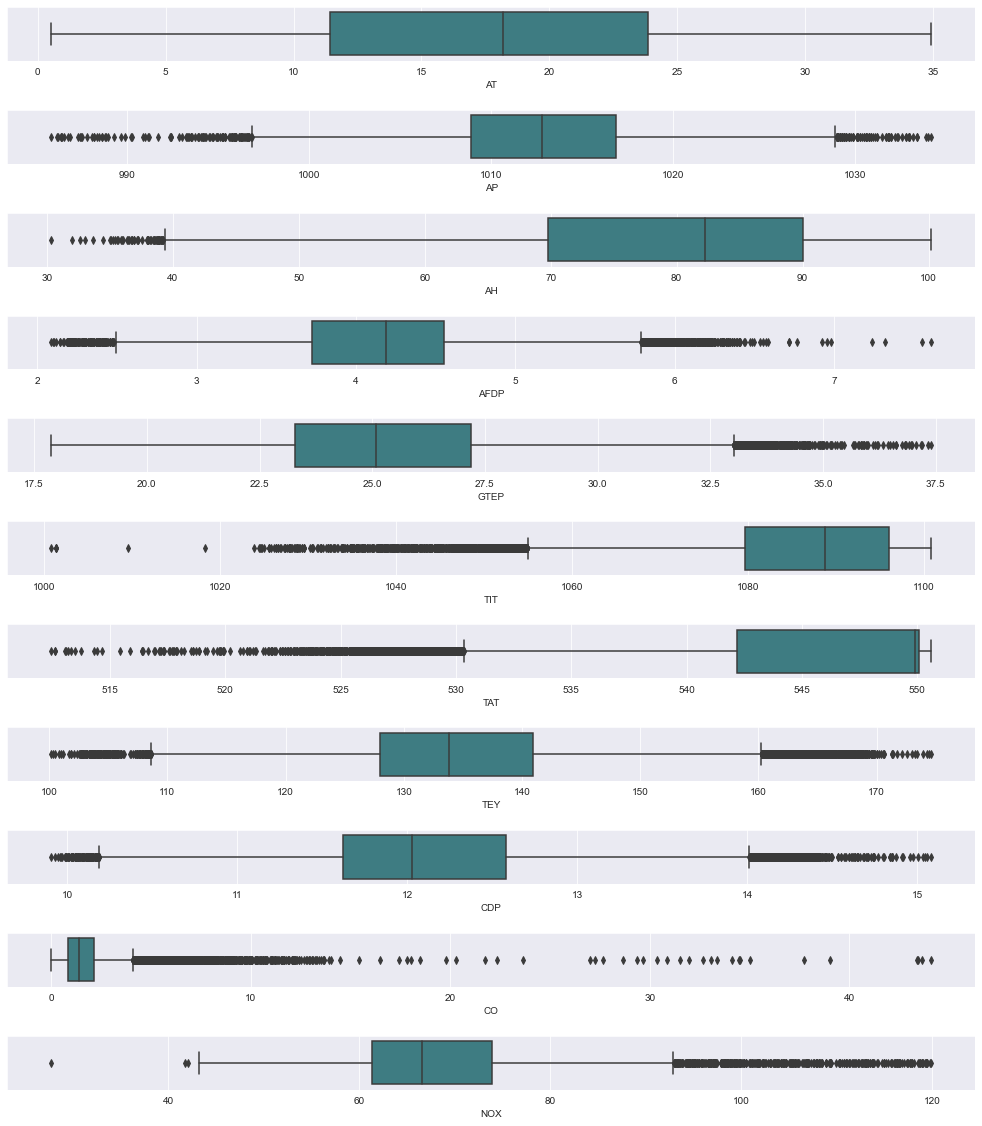

In [23]:
outliers=gas_turbine.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=outliers,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=outliers,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=outliers,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=outliers,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)
plt.show()

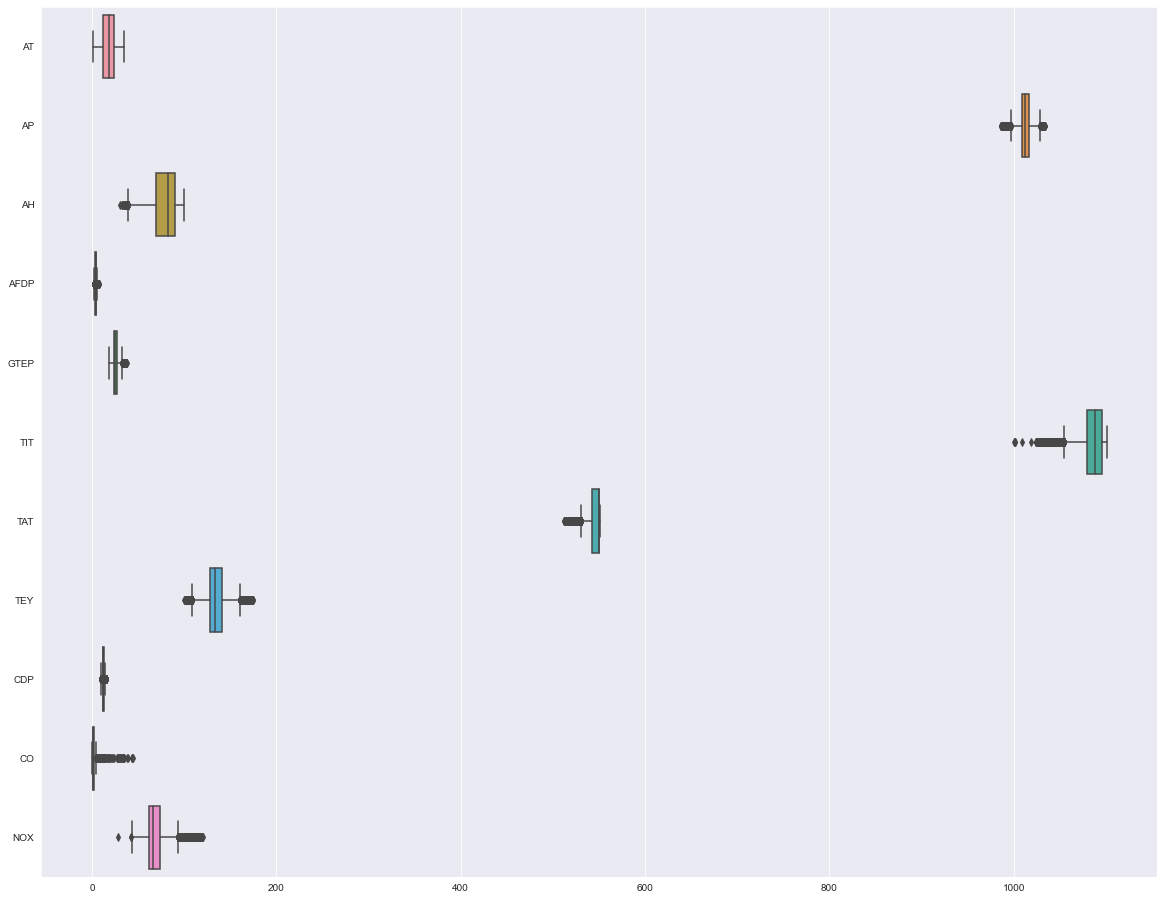

In [24]:
# Outliers:

plt.figure(figsize=(20,16))
sns.boxplot(data=gas_turbine[numerical_features], orient="h")
plt.show()

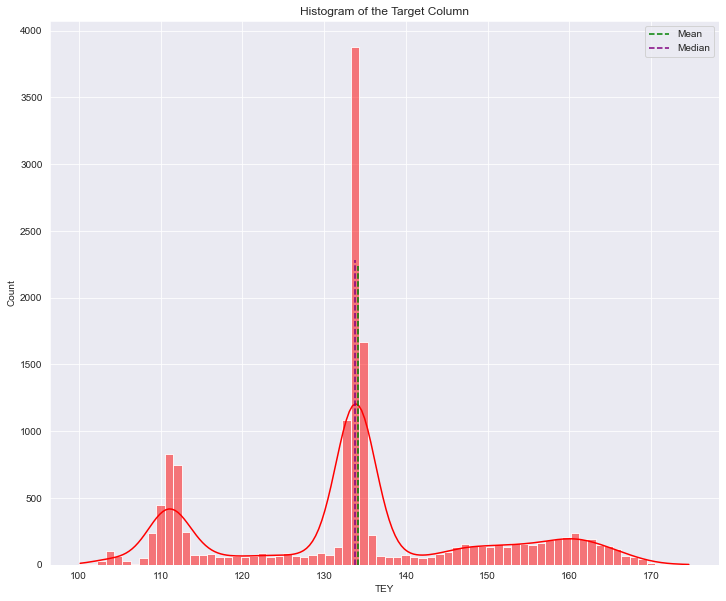

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=gas_turbine,x="TEY",color="red",kde=True)
plt.axvline(x=gas_turbine["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=gas_turbine["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")
plt.show()

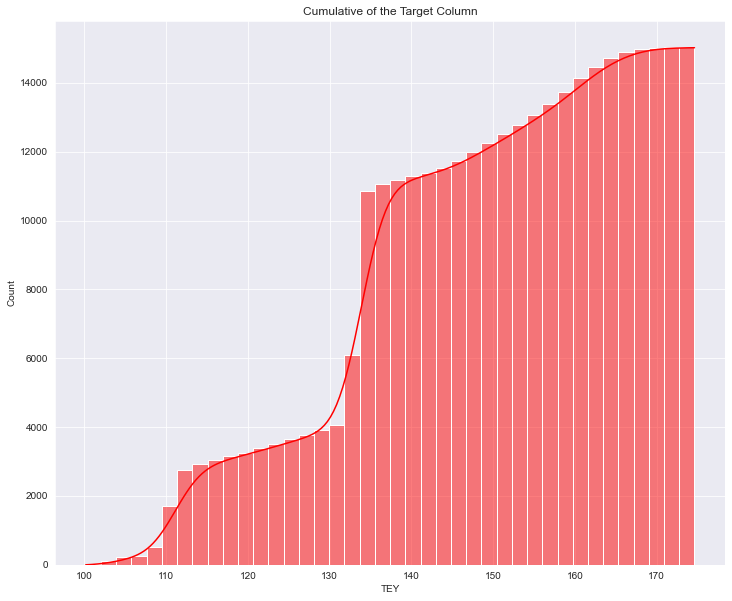

In [26]:
plt.figure(figsize = (12,10))
sns.histplot(gas_turbine["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")
plt.show()

**From above plot, mostly none of the features are on same scale as we already seen in the previous plot.**

## 4.2 Multivariate Analysis:
### Drawing a pairplot to visually examine the correlation between the features.

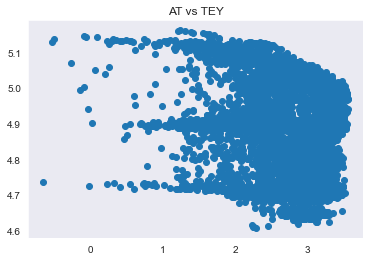

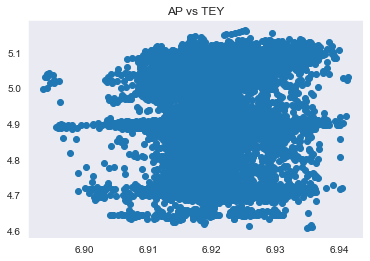

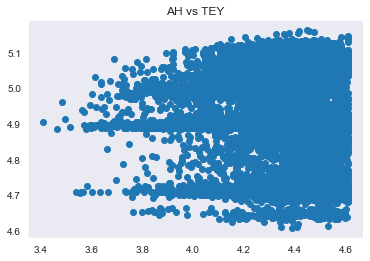

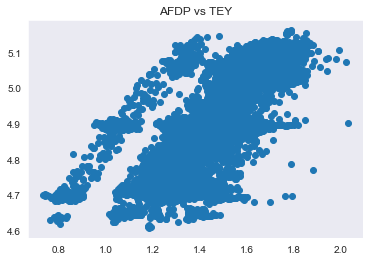

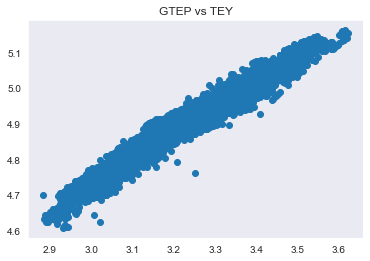

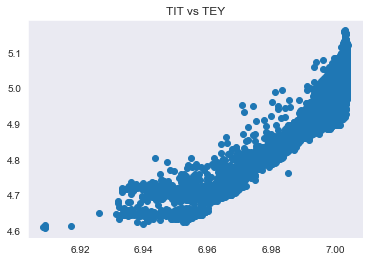

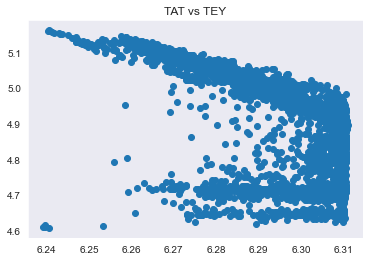

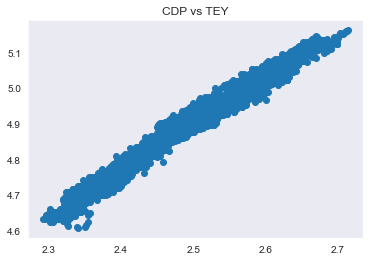

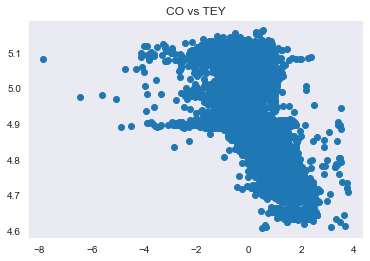

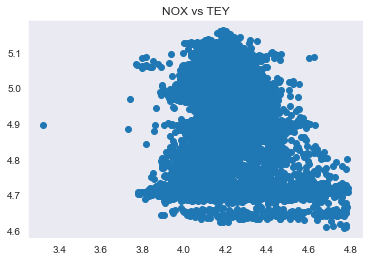

In [27]:
for i in gas_turbine.columns:
    
    if i!="TEY": 
        plt.scatter(np.log(gas_turbine[i]), np.log(gas_turbine['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

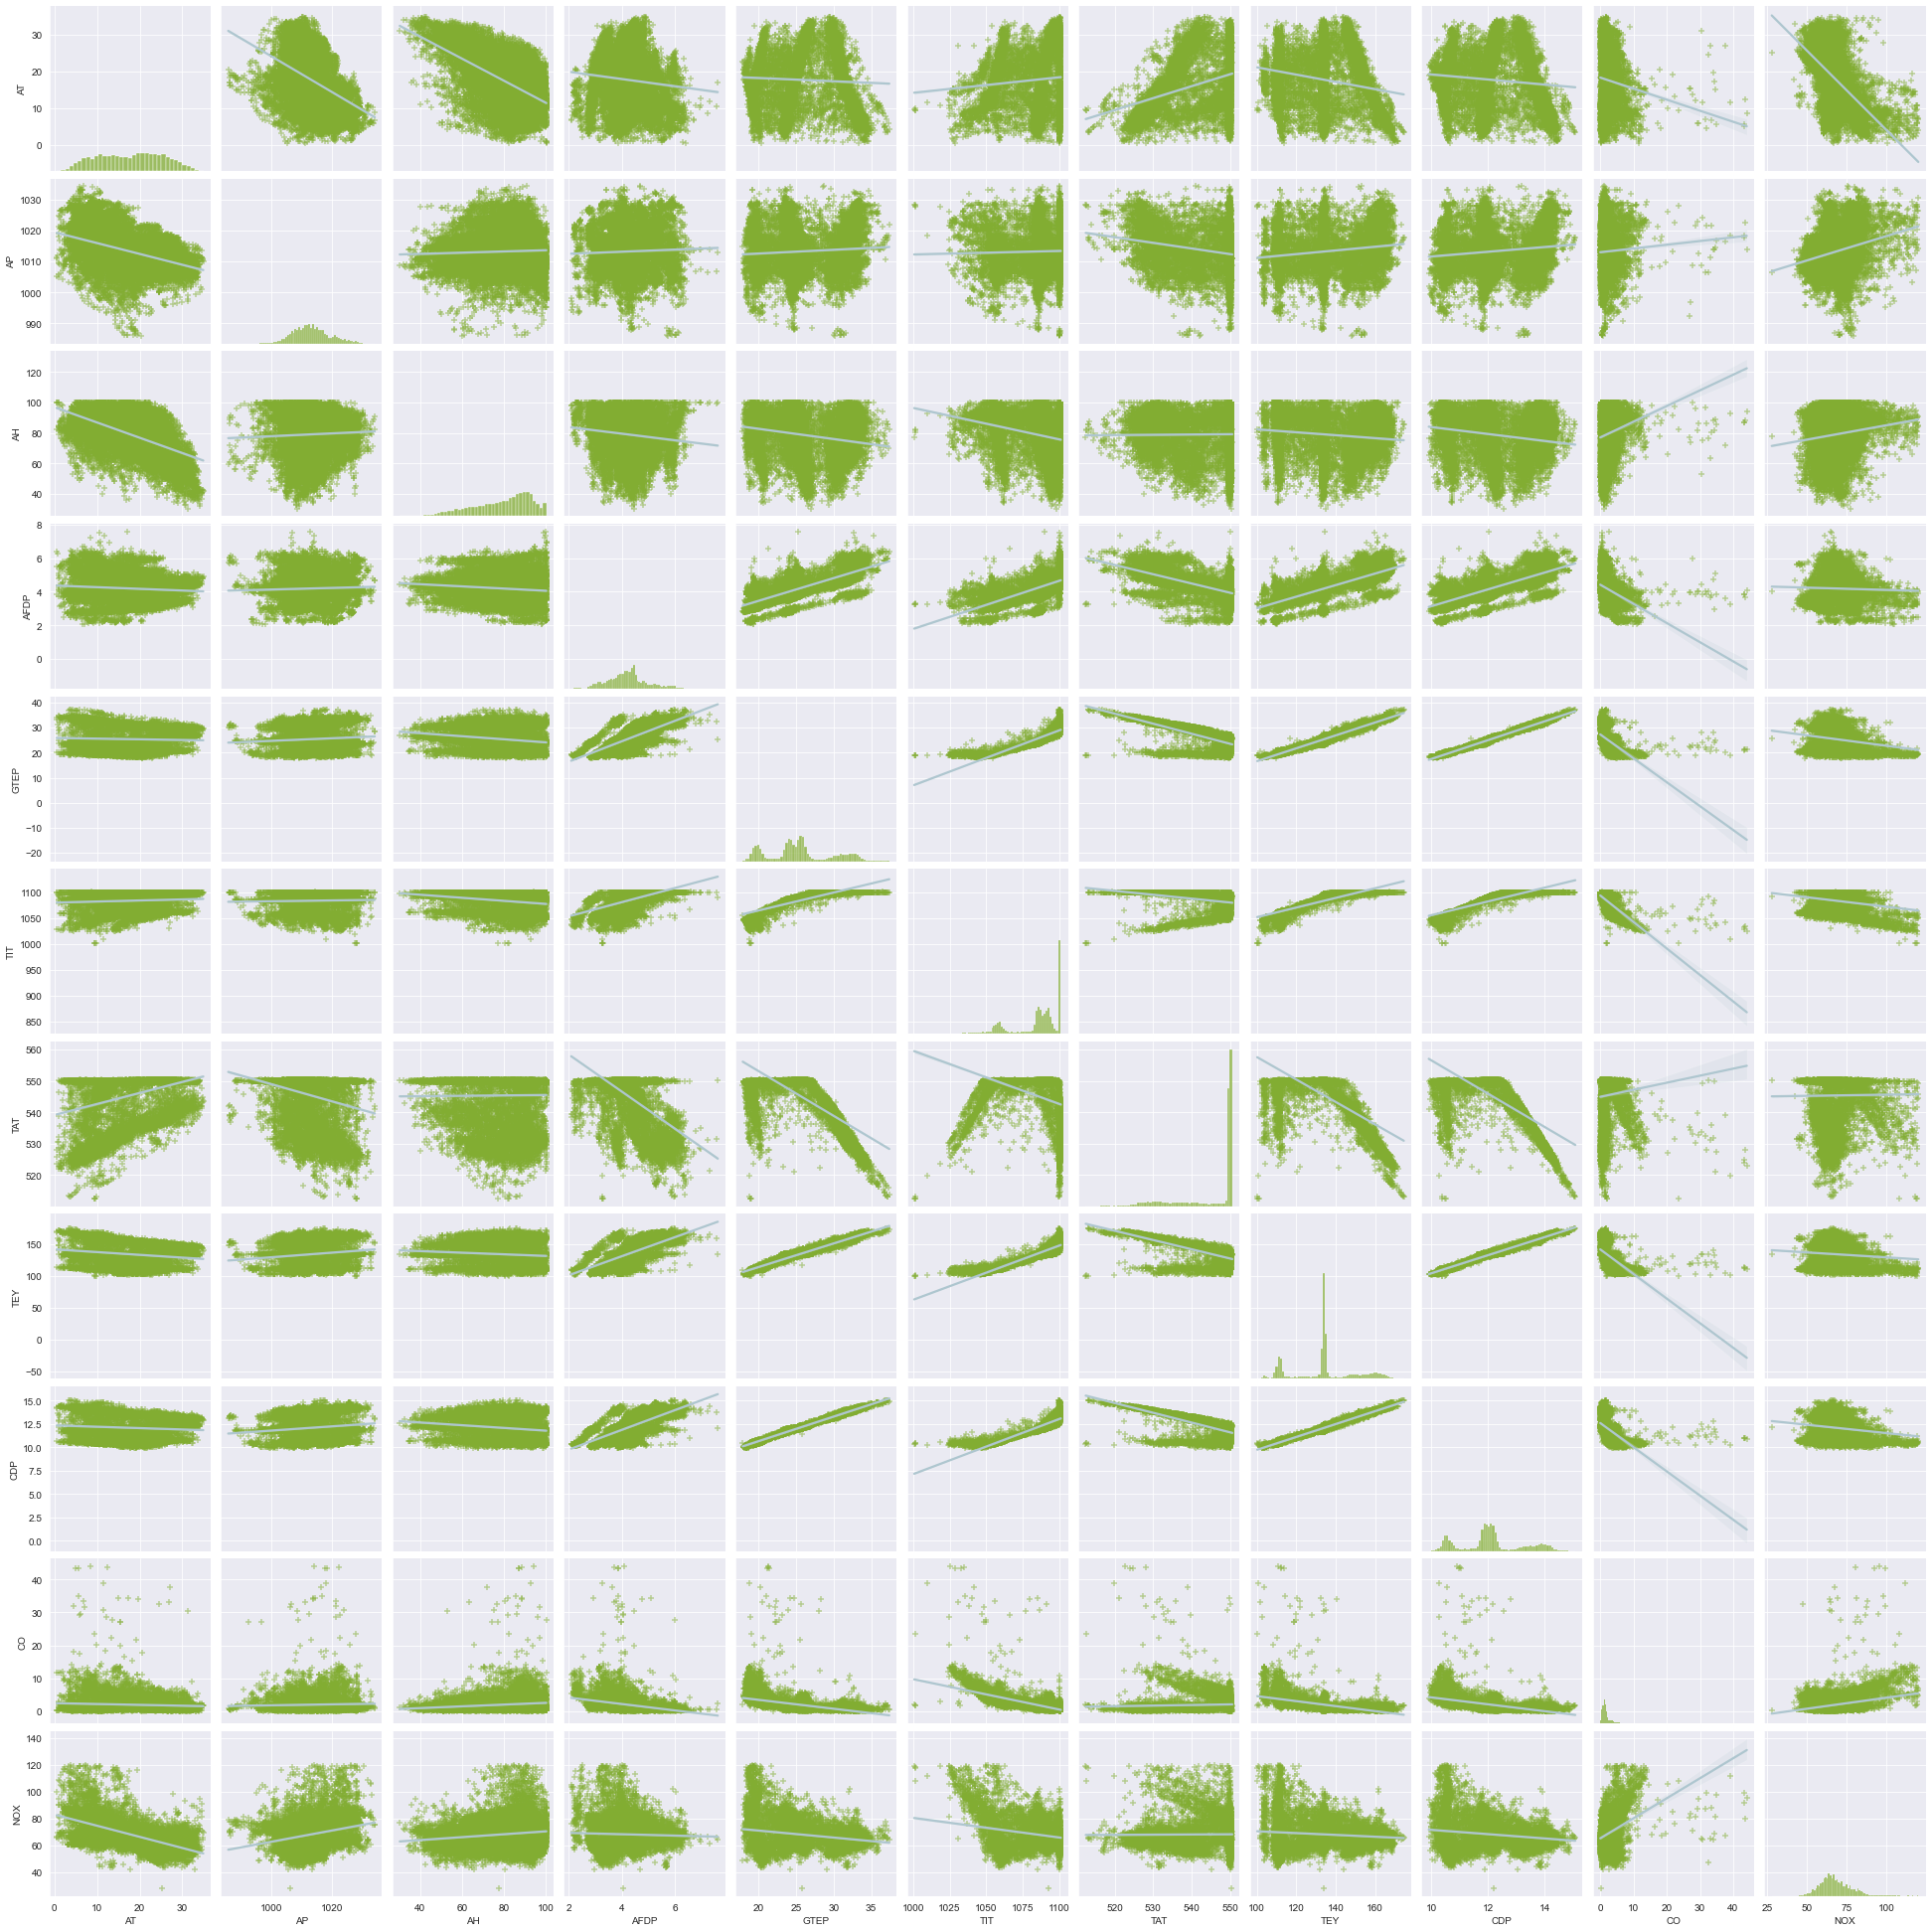

In [30]:
sns.pairplot(gas_turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})
plt.show()

<Figure size 1440x1440 with 0 Axes>

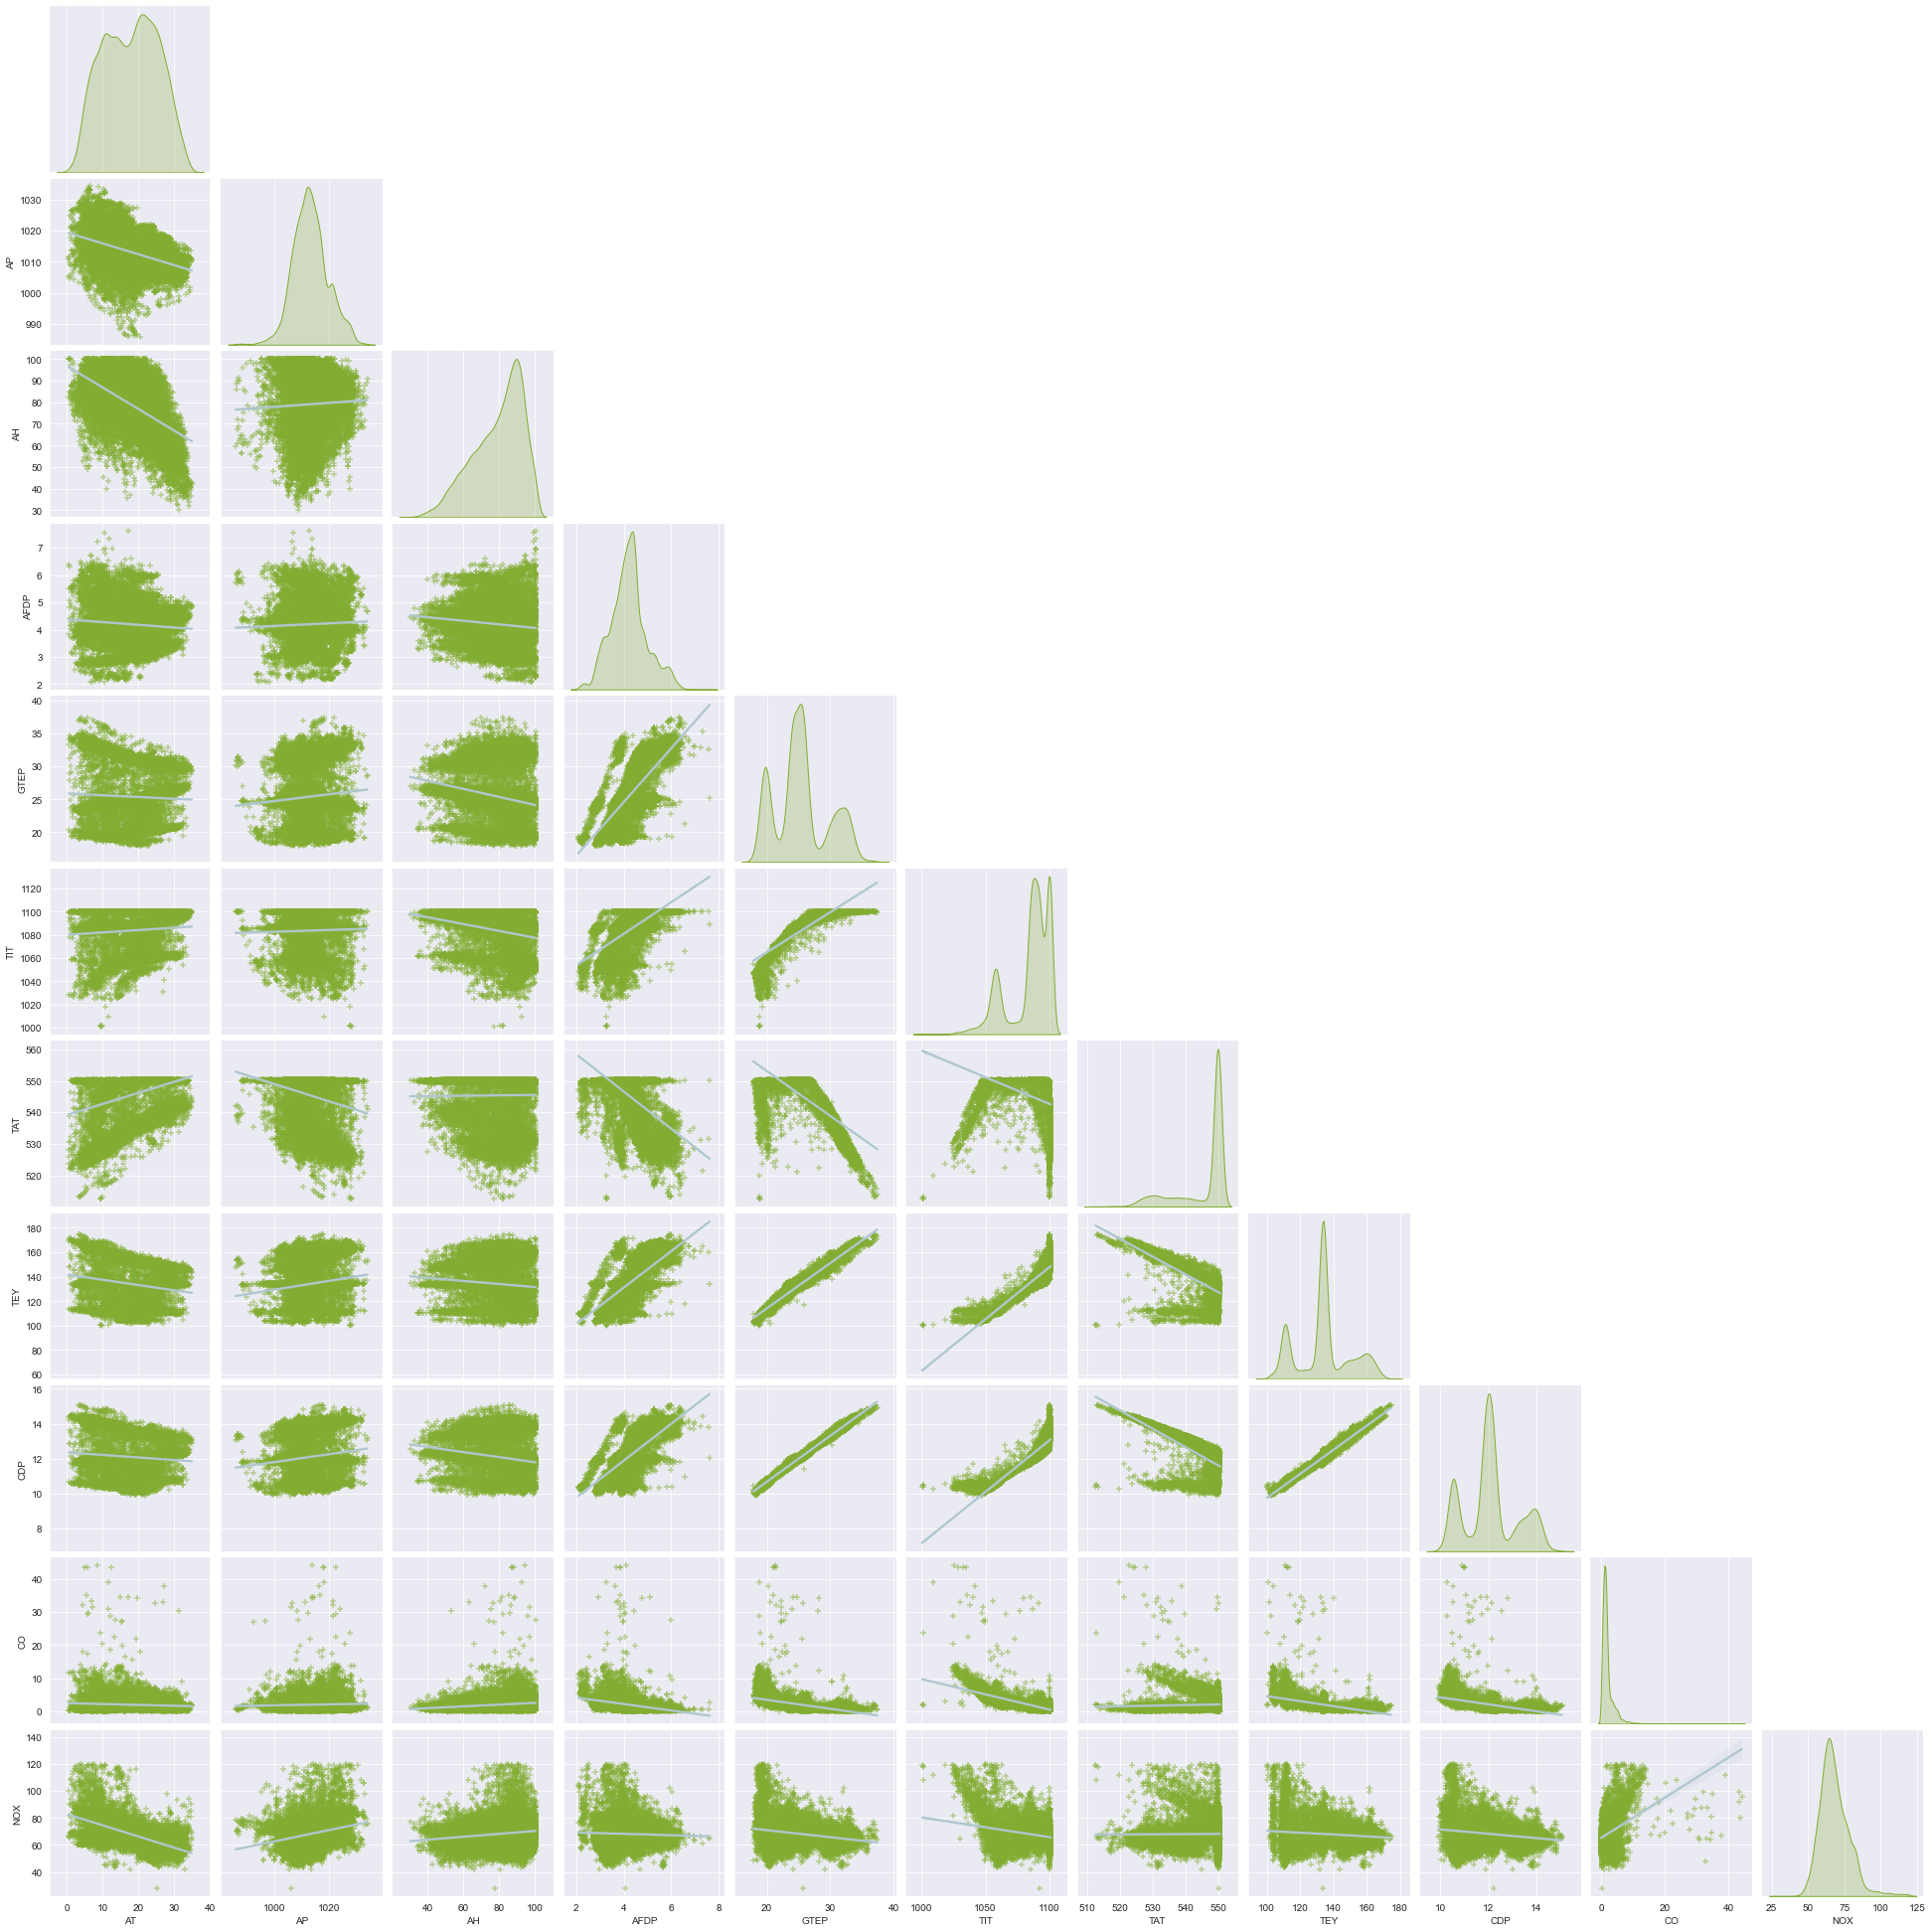

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(gas_turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})
plt.show()

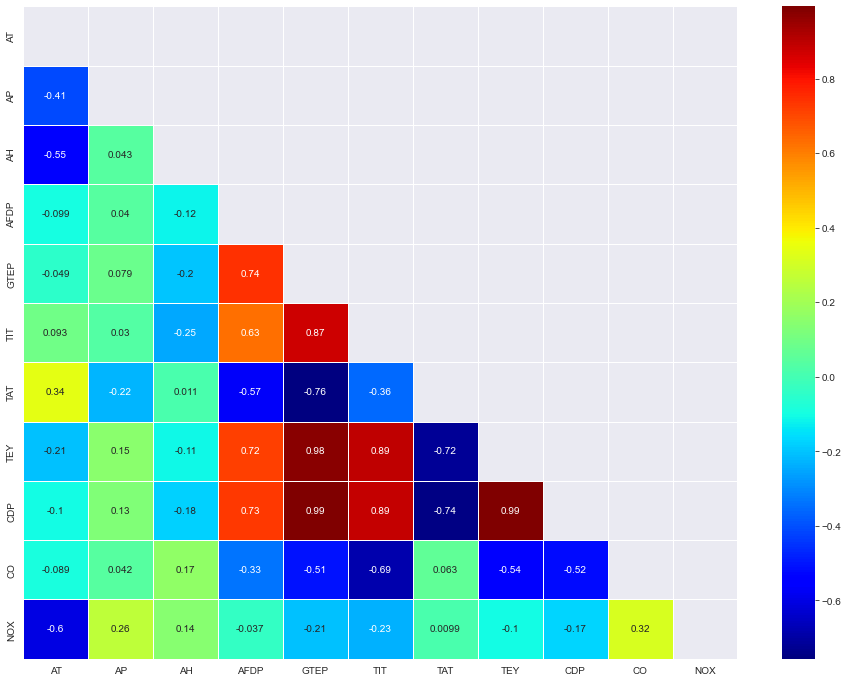

In [32]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(gas_turbine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gas_turbine.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)
plt.show()

In [33]:
x = gas_turbine.drop('TEY', axis=1)
y = gas_turbine[["TEY"]]

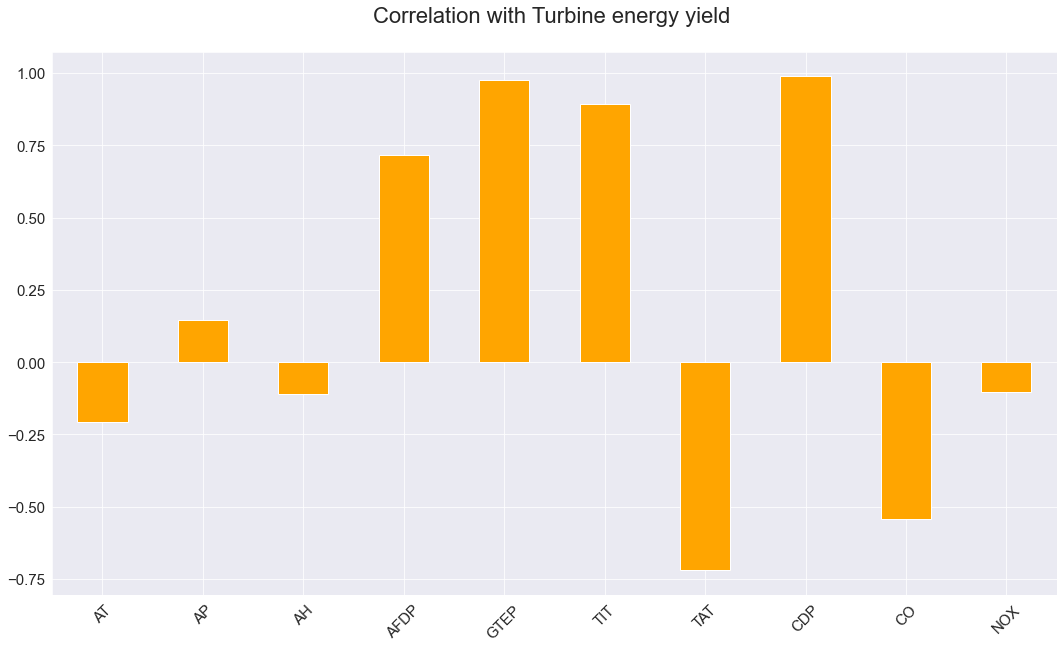

In [34]:
data_2 = gas_turbine.copy()

correlations = data_2.corrwith(gas_turbine.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

# 5. Feature Selection Technique:

In [35]:
from numpy import set_printoptions # Feature importance:

In [36]:
test = SelectKBest(score_func=mutual_info_regression, k='all') # Feature extraction:
fit = test.fit(x, y)

In [37]:
scores = fit.scores_        # Summarize scores:

features = fit.transform(x)

In [38]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
7  1.712934     CDP
4  1.600566    GTEP
5  1.322370     TIT
6  0.894681     TAT
3  0.661071    AFDP
8  0.512760      CO
0  0.411898      AT
9  0.301042     NOX
1  0.138871      AP
2  0.097728      AH

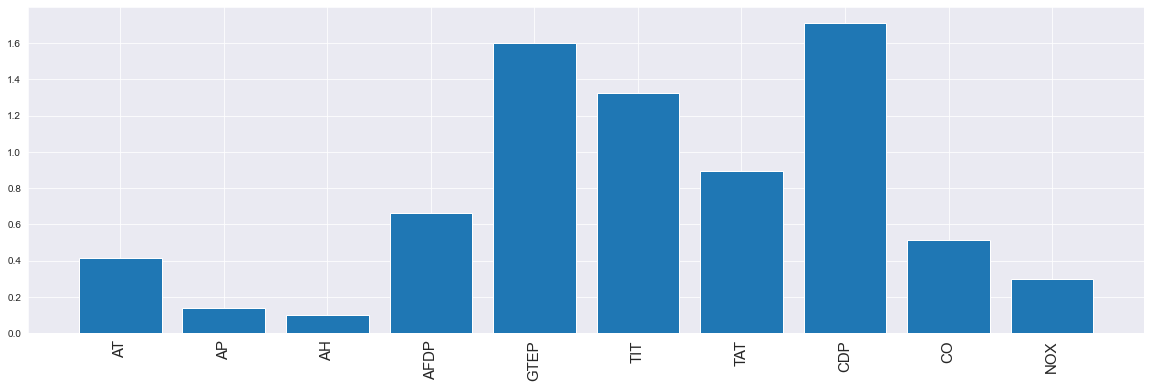

In [39]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

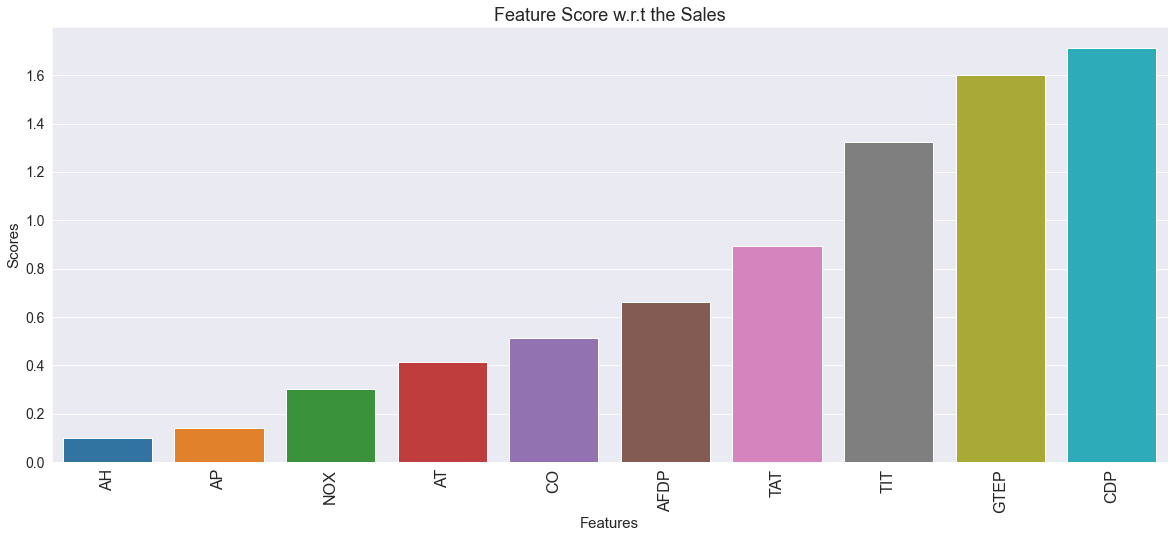

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)

plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [41]:
score_df.sort_values('Score',ascending=False)

Score Feature
7  1.712934     CDP
4  1.600566    GTEP
5  1.322370     TIT
6  0.894681     TAT
3  0.661071    AFDP
8  0.512760      CO
0  0.411898      AT
9  0.301042     NOX
1  0.138871      AP
2  0.097728      AH

In [42]:
model_data = gas_turbine[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

## 5.1. Data Pre-Processing:

**Dealing with missing data:**
    
There is no missing value in our dataset. 

**Feature Engineering:**

Applying some Data Transformation to increase the linear realtionship and 
Improve our model prediction as well it scores.

### Applying Standard Scaler:
    
1. For each feature, Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1 (or variance).

   x_scaled = x – Mean / Std_dev


2. Standard Scaler assumes that the distribution of the variable is normal. 
3. Thus in case the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler.

In [43]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [44]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

**Now, We will check the Mean and Standard Deviation of our scaled data. It should have a Mean '0' and Standard Deviation '1'**

In [46]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


## 5.2 Test Train Split With Imbalanced Dataset:

In [47]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [48]:
# Splitting data into test data and train data:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# 6. Hyperparameter Tuning:

## 6.1 Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [49]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [50]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

Reloading Oracle from existing project project\Gas Turbine\oracle.json
Reloading Tuner from project\Gas Turbine\tuner0.json


In [51]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [52]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Oracle triggered exit


In [53]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 64
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.023906338959932327
Trial summary
Hyperparameters:
num_layers: 4
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
Score: 0.02508847912152608
Trial summary
Hyperparameters:
num_layers: 12
units_0: 32
units_1: 32
learning_rate: 0.0001
units_2: 64
units_3: 32
units_4: 96
units_5: 32
units_6: 64
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 0.025214387103915215
Trial summary
Hyperparameters:
num_layers: 13
units_0: 96
units_1: 64
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 64
units_5: 32
units_6: 32
units_7: 96
units_8: 64
units_9: 96
units_10: 64
units_11: 32
units_12: 32
Score: 0.02798572989801566
Trial summary
Hyperparameters:
num_layers: 19
units_0: 96
units_1: 64
learning_rate: 0.01
units_2: 64
u

## 6.2 Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [54]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [55]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [56]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.058 total time=  21.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.049 total time=  10.1s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.037 total time=  10.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.066 total time=  10.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.047 total time=  10.1s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [57]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.02998438961803913, using {'batch_size': 40, 'epochs': 200}
-0.051392828673124315,0.009811975998428833 with {'batch_size': 10, 'epochs': 10}
-0.03428240306675434,0.004820768266096326 with {'batch_size': 10, 'epochs': 50}
-0.03288537114858627,0.002471746826149732 with {'batch_size': 10, 'epochs': 100}
-0.034836136177182196,0.0054819292387524934 with {'batch_size': 10, 'epochs': 200}
-0.04335618540644646,0.008985912978727337 with {'batch_size': 20, 'epochs': 10}
-0.032387669384479525,0.00417097293919964 with {'batch_size': 20, 'epochs': 50}
-0.03388264887034893,0.0056280585277735705 with {'batch_size': 20, 'epochs': 100}
-0.032591094449162486,0.004441376056927401 with {'batch_size': 20, 'epochs': 200}
-0.0460317749530077,0.012639005948496394 with {'batch_size': 40, 'epochs': 10}
-0.04150032475590706,0.009052824127066603 with {'batch_size': 40, 'epochs': 50}
-0.031307942047715184,0.0038436649157265568 with {'batch_size': 40, 'epochs': 100}
-0.02998438961803913,0.003504580833414742 

## 6.3 Hyperparameter Tuning: Optimal Droupout rate

In [58]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [59]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [60]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.028 total time=  53.1s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  50.4s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.031 total time=  52.7s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.035 total time=  53.1s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time=  50.8s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [61]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.030172361060976982, using {'dropout_rate': 0.0}
-0.030172361060976982,0.002861044600095246 with {'dropout_rate': 0.0}
-0.03327407650649548,0.002903775926235832 with {'dropout_rate': 0.1}
-0.03127295859158039,0.002210230197495054 with {'dropout_rate': 0.2}
-0.03566717654466629,0.0065035368061917235 with {'dropout_rate': 0.3}
-0.03354784324765205,0.008897673100508572 with {'dropout_rate': 0.4}
-0.03157458901405334,0.003662331510527179 with {'dropout_rate': 0.5}


## 6.4 Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [62]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [63]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [64]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.814 total time= 1.5min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.827 total time= 1.3min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.757 total time= 1.3min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.821 total time= 1.3min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.816 total time= 1.3min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [65]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.6785272777080535, using {'activation_function': 'tanh', 'init': 'uniform'}
-0.8068812966346741,0.025128655704717843 with {'activation_function': 'softmax', 'init': 'normal'}
-0.7887931108474732,0.11606453088899597 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.8011398673057556,0.051021573344173766 with {'activation_function': 'softmax', 'init': 'zero'}
-0.7886436462402344,0.09305441734746193 with {'activation_function': 'tanh', 'init': 'normal'}
-0.6785272777080535,0.14563625927356125 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.8498514533042908,0.066241046687176 with {'activation_function': 'tanh', 'init': 'zero'}
-0.753550124168396,0.08188751650694943 with {'activation_function': 'relu', 'init': 'normal'}
-0.8065577387809754,0.07203057261589088 with {'activation_function': 'relu', 'init': 'uniform'}
-0.7096348166465759,0.182490616857695 with {'activation_function': 'relu', 'init': 'zero'}


# 7. Model Building Neural Networks:
Standardizing only predictor variable - after train test split

In [66]:
model_data

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0      10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1      10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2      10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3      10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4      10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72
...       ...     ...     ...     ...     ...     ...     ...     ...
15034  10.400  19.164  1049.7  546.21  3.5421  4.5186  9.0301  111.61
15035  10.433  19.414  1046.3  543.22  3.5059  4.8470  7.8879  111.78
15036  10.483  19.530  1037.7  537.32  3.4770  7.9632  7.2647  110.19
15037  10.533  19.377  1043.2  541.24  3.4486  6.2494  7.0060  110.74
15038  10.583  19.306  1049.9  545.85  3.4275  4.9816  6.9279  111.58

[15039 rows x 8 columns]

In [67]:
# Here we are assigning predictor variables to x and response variable to y:

x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # Scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test)   # Scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

# For removing heading from y_test
# y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [68]:
# Since we have continuous ouput, AF is not required in the o/p layer:

model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 2s 7ms/step - loss: 17643.3887 - mae: 131.8670 - mse: 17643.3887 - val_loss: 16818.5020 - val_mae: 128.7265 - val_mse: 16818.5000
Epoch 2/100
169/169 [==============================] - 1s 4ms/step - loss: 16325.6787 - mae: 126.7781 - mse: 16325.6787 - val_loss: 15771.1064 - val_mae: 124.5917 - val_mse: 15771.1064
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15353.0791 - mae: 122.8858 - mse: 15353.0791 - val_loss: 14854.1826 - val_mae: 120.8561 - val_mse: 14854.1826
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 14469.2627 - mae: 119.2320 - mse: 14469.2627 - val_loss: 14001.6777 - val_mae: 117.2761 - val_mse: 14001.6777
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 13640.6064 - mae: 115.7067 - mse: 13640.6064 - val_loss: 13197.7148 - val_mae: 113.7969 - val_mse: 13197.7148
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 

In [69]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    # Defining list of hyperparameters:
    
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model:
            
            model = Sequential()
            
            # Defining the first layer of the model:
            
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model:
            
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node:
            # Since we will be predicting a single number:
        
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model:
    
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set:
            
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # Printing the results of the current iteration:
            
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function:

finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 1s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    98.15015
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.617066
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.622419
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.651843
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    80.877401
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.771389
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.609357
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.641099
dtype: float64
94/94 [==============

batchsize  epochs                         Accuracy
0          5       5   TEY    98.15015
dtype: float64
0          5      10  TEY    99.617066
dtype: float64
0          5      50  TEY    99.622419
dtype: float64
0          5     100  TEY    99.651843
dtype: float64
0         10       5  TEY    80.877401
dtype: float64
0         10      10  TEY    98.771389
dtype: float64
0         10      50  TEY    99.609357
dtype: float64
0         10     100  TEY    99.641099
dtype: float64
0         15       5  TEY    58.849193
dtype: float64
0         15      10  TEY    89.833298
dtype: float64
0         15      50  TEY    99.493025
dtype: float64
0         15     100  TEY    99.632043
dtype: float64
0         20       5  TEY    45.862395
dtype: float64
0         20      10  TEY    81.098948
dtype: float64
0         20      50  TEY    99.648602
dtype: float64
0         20     100  TEY    99.595901
dtype: float64

### Training Model - using best params:

In [72]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# Fitting the model to best params:

model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [79]:
model

## 7.1 Model Evaluation Train and Test Error:

In [97]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Error', 'Mean Squared Error'],loc = 'upper left')

# Summarize history for loss:

plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')

KeyError: 'mae'

<Figure size 1152x648 with 0 Axes>

## 7.2 Predicting values from Model using same dataset:

In [83]:
# Generating predictions for test data:

y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test:

predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 1s 4ms/step
(3008, 9)


CDP    GTEP     TIT     TAT    AFDP        CO       AT  Actual  \
13312  12.219  25.762  1092.5  550.25  4.0023   1.26430  24.0930  134.46   
12627  10.791  20.085  1059.6  549.94  3.2106   2.69370  20.4500  111.88   
6393   12.126  25.221  1089.9  549.62  4.5325   1.96250  20.2620  133.72   
4990   12.218  25.965  1092.9  549.96  4.4266   1.57120  26.8620  133.79   
12462  10.466  19.688  1056.9  550.01  3.1241   2.29960  19.4090  110.77   
7405   10.624  19.387  1058.9  550.17  3.3709   4.27640   2.2158  113.32   
10993  12.088  25.392  1089.7  550.11  3.7871   0.83578  23.8520  133.77   
9488   11.498  23.225  1079.4  549.60  4.2837   2.01980  12.3950  128.98   
14201  13.971  32.518  1100.1  528.98  5.1559   0.87760  12.3590  159.42   
9757   13.862  32.105  1100.0  530.69  5.9309  10.75000   8.6376  161.86   

        Predicted  
13312  134.836212  
12627  112.717003  
6393   134.151031  
4990   134.084015  
12462  111.303299  
7405   113.791534  
10993  133.910355  
9488   129.325287  
14201  160.437988  
9757   160.740082

In [84]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

## 7.3 Calculating Absolute Percent Error and Error:

In [85]:
# Computing the absolute percent error:

APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# Adding absolute percent error to table:

predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.62585858234968


Actual   Predicted     APE %
13312  134.46  134.836212  0.279795
12627  111.88  112.717003  0.748126
6393   133.72  134.151031  0.322339
4990   133.79  134.084015  0.219758
12462  110.77  111.303299  0.481447

In [86]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

Actual   Predicted     APE %     Error
0     134.46  134.836212  0.279795 -0.002798
1     111.88  112.717003  0.748126 -0.007481
2     133.72  134.151031  0.322339 -0.003223
3     133.79  134.084015  0.219758 -0.002198
4     110.77  111.303299  0.481447 -0.004814
...      ...         ...       ...       ...
3003  119.25  119.998032  0.627280 -0.006273
3004  133.74  134.259644  0.388548 -0.003885
3005  146.31  146.597015  0.196169 -0.001962
3006  150.07  150.095367  0.016904 -0.000169
3007  111.77  111.821159  0.045772 -0.000458

[3008 rows x 4 columns]

## 7.4 Visualizing the Relationship between the Actual & Predicted Values Model Validation:

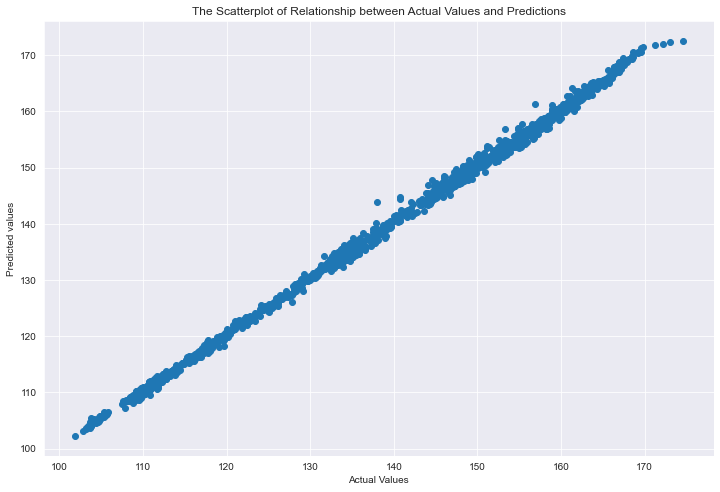

In [88]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [89]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score:

from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5015052036528894
MSE: 0.4397210581695653
RMSE: 0.6631146644205399


In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9986609564927045
R2_score (test):  0.9982438526718069


In [92]:
# Evaluation of explained variance score (R^2):

print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.87 of the target correctly


## 7.5 Residual Analysis:

### Test for Normality of Residuals (Q-Q Plot):

<AxesSubplot:ylabel='Density'>

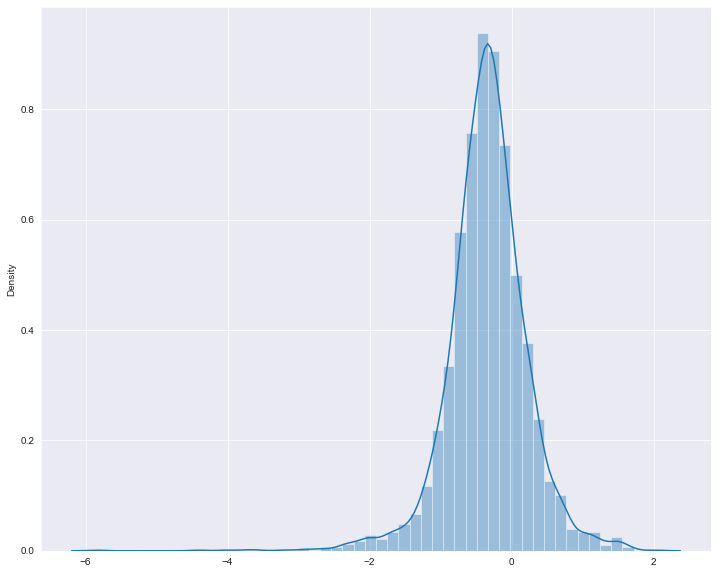

In [94]:
# Now we will visualize the differences between our predictions and actual y test data:

plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) 

# This figure also proves that our model fits very good # There is no huge differences between our predictions & actual y data.

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

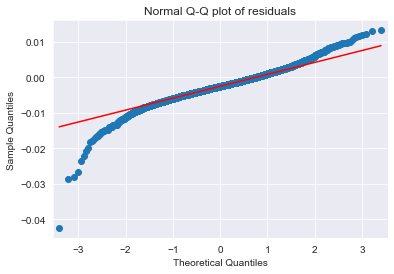

In [95]:
# Residuals values  = y - yhat:

import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')

## Observation: 
    
### Error should have Normal / Gaussian distribution ~ N (0,1) and independently, identically distributed.

# ============================The End========================